In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [2]:
start = "2015-01-01"

end = date.today().strftime ("%Y-%m-%d")

df = data.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.983650
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.745998
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.048857
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.051123
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.388374


In [3]:
# n_year = st.slider("Years of Predictions","start","end")
# period = n_year*365

In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-20,170.580002,167.460007,168.279999,169.750000,107499100.0,169.750000
2021-12-21,173.199997,169.119995,171.559998,172.990005,91185900.0,172.990005
2021-12-22,175.860001,172.149994,173.039993,175.639999,92135300.0,175.639999
2021-12-23,176.850006,175.270004,175.850006,176.279999,68227500.0,176.279999
2021-12-27,180.419998,177.070007,177.089996,180.330002,74717300.0,180.330002


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.983650
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.745998
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.048857
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.051123
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.388374


In [6]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0


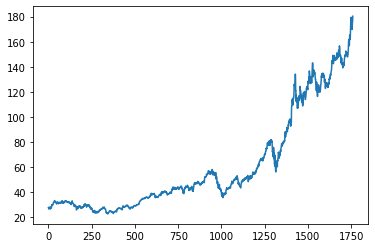

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0
...,...,...,...,...,...
1755,170.580002,167.460007,168.279999,169.750000,107499100.0
1756,173.199997,169.119995,171.559998,172.990005,91185900.0
1757,175.860001,172.149994,173.039993,175.639999,92135300.0
1758,176.850006,175.270004,175.850006,176.279999,68227500.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1755    152.1489
1756    152.4202
1757    152.7214
1758    153.0106
1759    153.3444
Name: Close, Length: 1760, dtype: float64

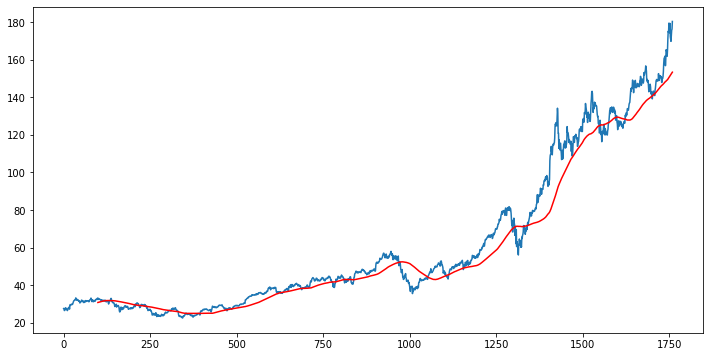

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1755    141.7498
1756    142.0093
1757    142.2876
1758    142.5592
1759    142.8557
Name: Close, Length: 1760, dtype: float64

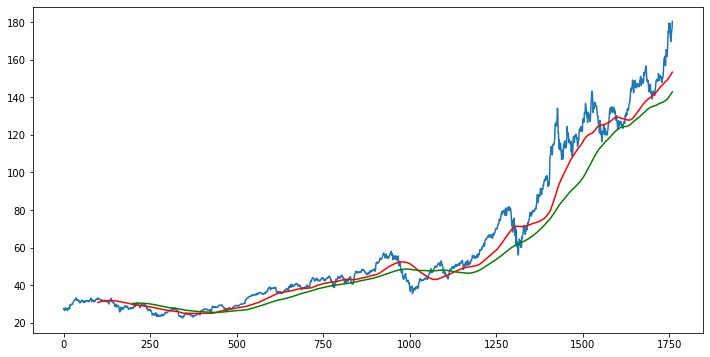

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(1760, 5)

In [14]:
#Splitting data into Training and Testing
# This is used to Match actual output and Predicted output

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1232, 1)
(528, 1)


In [15]:
data_training.head()

,Close
0,27.594999
1,27.332500
2,26.562500
3,26.565001
4,26.937500


In [16]:
data_testing.head()

,Close
1232,65.502502
1233,65.445000
1234,66.592499
1235,66.072502
1236,66.959999


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.11337407],
       [0.10743383],
       [0.09000907],
       ...,
       [1.        ],
       [0.99541753],
       [0.97787959]])

In [19]:
data_training_array.shape

(1232, 1)

In [20]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [21]:
x_train.shape

(1132, 100, 1)

In [22]:
# ML Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [34]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
36/36 [==============================] - 8s 118ms/step - loss: 0.0815
Epoch 2/50
36/36 [==============================] - 4s 115ms/step - loss: 0.0187
Epoch 3/50
36/36 [==============================] - 4s 115ms/step - loss: 0.0186
Epoch 4/50
36/36 [==============================] - 4s 115ms/step - loss: 0.0153
Epoch 5/50
36/36 [==============================] - 4s 115ms/step - loss: 0.0131
Epoch 6/50
36/36 [==============================] - 4s 115ms/step - loss: 0.0120
Epoch 7/50
36/36 [==============================] - 4s 121ms/step - loss: 0.0106
Epoch 8/50
36/36 [==============================] - 5s 134ms/step - loss: 0.0107
Epoch 9/50
36/36 [==============================] - 5s 134ms/step - loss: 0.0117
Epoch 10/50
36/36 [==============================] - 5s 136ms/step - loss: 0.0094
Epoch 11/50
36/36 [==============================] - 5s 134ms/step - loss: 0.0093
Epoch 12/50
36/36 [==============================] - 5s 136ms/step - loss: 0.0099
Epoch 13/50
36/36 [======

In [35]:
model.save("keras_model.h5")

In [36]:
data_testing.head()

,Close
1222,64.857498
1223,65.035004
1224,65.550003
1225,65.489998
1226,66.117500


In [38]:
data_training.tail(100)

,Close
1122,49.612499
1123,49.467499
1124,49.865002
1125,49.695000
1126,49.645000
...,...
1217,62.189999
1218,63.955002
1219,64.375000
1220,64.282501


In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [41]:
final_df.head()

,Close
0,49.612499
1,49.467499
2,49.865002
3,49.695000
4,49.645000


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01087929],
       [0.00964445],
       [0.01302962],
       [0.01158187],
       [0.01115607],
       [0.00474773],
       [0.01375347],
       [0.01362574],
       [0.00975091],
       [0.01747926],
       [0.01999148],
       [0.02356825],
       [0.02318501],
       [0.01422186],
       [0.01681927],
       [0.02105599],
       [0.01790505],
       [0.02120504],
       [0.02527147],
       [0.02375986],
       [0.0213115 ],
       [0.02622952],
       [0.01969342],
       [0.02955079],
       [0.03299979],
       [0.03263786],
       [0.02912499],
       [0.03065789],
       [0.03478816],
       [0.03287205],
       [0.04194166],
       [0.03212688],
       [0.02273794],
       [0.        ],
       [0.00779222],
       [0.0121354 ],
       [0.02148179],
       [0.01628701],
       [0.01520119],
       [0.03327657],
       [0.02003407],
       [0.01788378],
       [0.02801789],
       [0.03621463],
       [0.03623591],
       [0.04109007],
       [0.04070686],
       [0.019

In [43]:
input_data.shape

(624, 1)

In [44]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [45]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(524, 100, 1)
(524,)


In [46]:
#Making Predictions

y_predicted = model.predict(x_test)

In [47]:
y_predicted.shape

(524, 1)

In [48]:
y_test

array([0.14070683, 0.14221848, 0.14660425, 0.14609325, 0.1514371 ,
       0.14754103, 0.15418356, 0.15703643, 0.15531193, 0.14871196,
       0.14619974, 0.14571004, 0.15548223, 0.1510539 , 0.15861189,
       0.15735577, 0.15077711, 0.14074945, 0.14562486, 0.15380028,
       0.16472216, 0.15665323, 0.15997449, 0.1648499 , 0.16631892,
       0.17417501, 0.18420267, 0.18537367, 0.18394719, 0.18454332,
       0.18330851, 0.19301683, 0.19359165, 0.20559934, 0.20536512,
       0.20902703, 0.21356185, 0.2278263 , 0.22160954, 0.2266553 ,
       0.22365344, 0.23387271, 0.24758359, 0.24907387, 0.26318927,
       0.25407707, 0.2512242 , 0.25952736, 0.26695767, 0.26235899,
       0.26476479, 0.26802218, 0.26606346, 0.24613587, 0.26474348,
       0.27890144, 0.2779008 , 0.24732812, 0.24551844, 0.26721315,
       0.27274861, 0.28075367, 0.26972537, 0.27296146, 0.26883116,
       0.28499046, 0.28002981, 0.28020017, 0.26753249, 0.27736854,
       0.27030018, 0.2548648 , 0.2232063 , 0.2017032 , 0.21143

In [49]:
y_predicted

array([[0.10700788],
       [0.10995625],
       [0.11313145],
       [0.11645025],
       [0.11979586],
       [0.12308799],
       [0.12620077],
       [0.12907381],
       [0.1317005 ],
       [0.13406068],
       [0.13605021],
       [0.1375402 ],
       [0.13843477],
       [0.13880527],
       [0.13874716],
       [0.13845125],
       [0.13809952],
       [0.13775392],
       [0.13731214],
       [0.13670155],
       [0.13598125],
       [0.13538773],
       [0.13506472],
       [0.13510881],
       [0.1356039 ],
       [0.13658684],
       [0.13811477],
       [0.14029975],
       [0.14318585],
       [0.14668411],
       [0.15060529],
       [0.15468323],
       [0.15875296],
       [0.162691  ],
       [0.16653013],
       [0.1702975 ],
       [0.17400229],
       [0.17765328],
       [0.18133707],
       [0.18502398],
       [0.18863901],
       [0.1920631 ],
       [0.1952388 ],
       [0.19821525],
       [0.20107096],
       [0.20398667],
       [0.20702292],
       [0.210

In [50]:
scaler.scale_

array([0.00851607])

In [52]:
scale_factor = 1/0.00851607
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

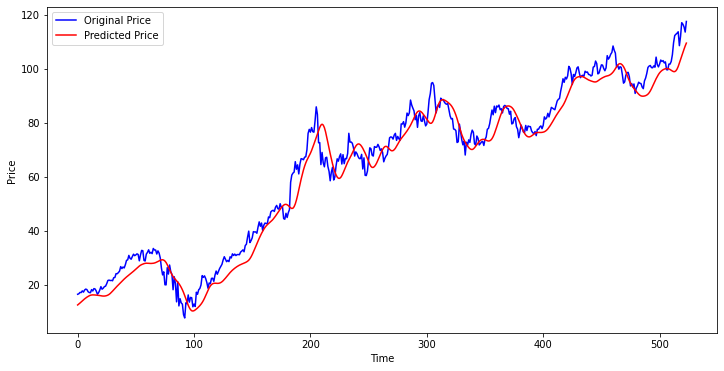

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ="Original Price")
plt.plot(y_predicted,"r",label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()